##Instigating fraud activitiy in finacial transaction
Final Project - Brain Station Data Science Certificate

# Why Fraud Detection in Fincial sector is imprtant?

Working on financial datasets for fraud detection is important because financial fraud can have serious consequences for individuals and businesses, including financial losses, legal and regulatory sanctions, damage to reputation, and loss of customer trust. By developing effective fraud detection models using financial data, organizations can detect fraudulent activity early and prevent further losses.
Fraud detection is an important aspect of banking and financial companies. It’s essential for both financial institutions as well as their customers to be able to identify fraud quickly and accurately. objective is to build a predictive model to determine whether a given transaction will be fraud or not.
Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.


# About DataSet
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
The goal of the project is to build a model that allows to identify a fraudulent transaction.

# Dataset Cloumns

trans_date_trans_time : Transaction time stamp
cc_num : Credit card number
merchant : merchant name
category : transaction category
amt : Transaction amount
first : First name of card holder
last : Last name of card holder
gender : Sex of card holder
street : transaction address
city : transaction city
state : transaction state
zip : transaction zipcode
lat : transaction lattitude
long : transaction longitude
city_pop : Population of the city
job : job of the card holder
dob : date of birth of card holder
trans_num : transaction number of transaction
unix_time : time in unix format
merch_lat : lattitude of the merchant
merch_long : longitude of merchant
is_fraud : nature of transaction (fraud or not fraud)

Dataset URL

https://www.kaggle.com/datasets/kartik2112/fraud-detection


In [178]:
# importing all project libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# Reading Dataset

In [75]:
#reading dataset
file1 = pd.read_csv('file1.csv')
file2 = pd.read_csv('file2.csv')

In [76]:
fraud= pd.concat([file1, file2])
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Initial Exploration of Dataset

In [77]:
fraud.shape

(1852394, 23)

In [78]:
fraud.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [48]:
fraud['amt']

0            2.86
1           29.84
2           41.28
3           60.05
4            3.19
            ...  
1296670     15.56
1296671     51.70
1296672    105.93
1296673     74.90
1296674      4.30
Name: amt, Length: 1852394, dtype: float64

In [79]:
fraud[fraud['amt'] < 1500]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [80]:
fraud['gender'].value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

## Start cleaning dataset

In [81]:
# Checking if any values are null/ counts the number of null values
fraud.isnull().sum()
# Another way of Checking if any values are null    fraud.isnull().values.any()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [82]:
df=fraud.reset_index()
df.head()

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [83]:
#geting rid of unnecesary columns, seems like index, Unnamed: 0 and zip columns need to be dropped for now

def drop_columns(df) :
    df.drop(columns=["index","Unnamed: 0",'zip'], inplace=True)
    return df

In [84]:
df = drop_columns(df)
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1852390,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1852391,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1852392,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [85]:
df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [86]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'lat', 'long',
       'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [87]:
#drop duplicate rows from dataframe
df = df.drop_duplicates()
df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,Carlotta,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,Morrisdale,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [88]:
# Analysis of numerical values
df.describe()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Exploring Dataset

In [89]:
df['gender'].value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

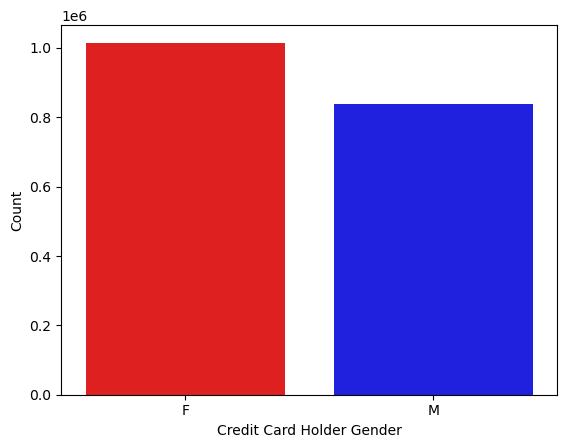

In [90]:
#let's copare men vs women in having ceadit card
plt.figure()
sns.countplot(x = 'gender', data = df, order = df.gender.value_counts().index, palette=["red","blue"])
plt.ylabel('Count')
plt.xlabel('Credit Card Holder Gender')
plt.show()

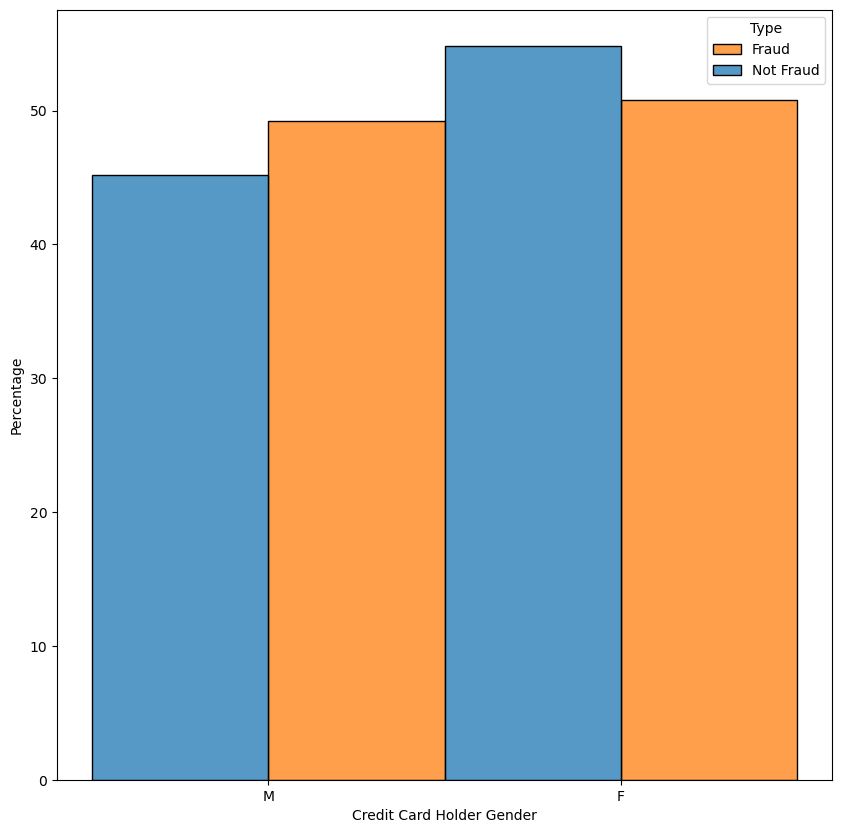

In [91]:
#Gender vs Fraud
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

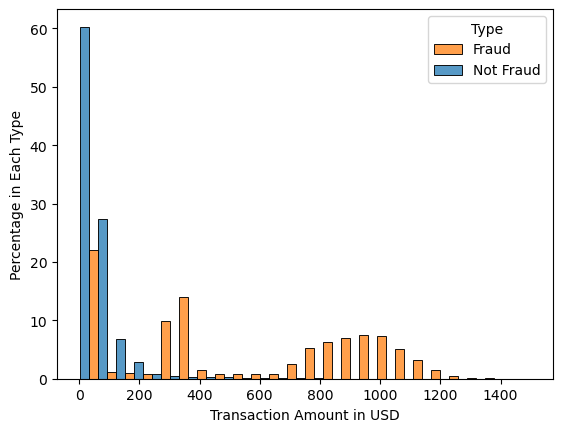

In [92]:
#amount vs fraud
sns.histplot(x='amt',data=df[df.amt<=1500],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
plt.ylabel('Percentage in Each Type')
plt.xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [93]:
DF = pd.get_dummies(df['gender'])
DF

,F,M
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
1852389,0,1
1852390,0,1
1852391,0,1
1852392,0,1


In [102]:
df = pd.concat([DF, df],axis=1)
df.head()

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,1,0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,0,1,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,0,1,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [103]:
#let's get customer's age based on their dob 
df['dob'].value_counts()

1977-03-23    8044
1988-09-15    6574
1981-08-29    6571
1955-05-06    5121
1960-01-13    4395
              ... 
1962-03-14       7
1960-10-28       7
1932-05-09       7
1999-10-26       7
1998-08-02       6
Name: dob, Length: 984, dtype: int64

In [104]:
df['year'] = pd.DatetimeIndex(df['dob']).year
df.head()

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year
0,0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,1968
1,1,0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,1990
2,1,0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,1970
3,0,1,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,1987
4,0,1,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,1955


In [105]:
df['age']=2023-df['year']
df.head()

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,age
0,0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,1968,55
1,1,0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,1990,33
2,1,0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,1970,53
3,0,1,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,1987,36
4,0,1,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,1955,68


In [107]:
#now let's drop column year
df_new = df.drop(['year'], axis=1)
df_new

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,55
1,1,0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,33
2,1,0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,53
3,0,1,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,36
4,0,1,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,62
1852390,0,1,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,44
1852391,0,1,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,56
1852392,0,1,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,43


In [108]:
#exract time, month and day of transaction
df_new['trans_time'] = pd.DatetimeIndex(df_new['trans_date_trans_time']).time
df_new['trans_month'] = pd.DatetimeIndex(df_new['trans_date_trans_time']).month
df_new['trans_day'] = pd.DatetimeIndex(df_new['trans_date_trans_time']).day
df_new

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day
0,0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,55,12:14:25,6,21
1,1,0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,33,12:14:33,6,21
2,1,0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,53,12:14:53,6,21
3,0,1,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,36,12:15:15,6,21
4,0,1,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,68,12:15:17,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,...,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,62,12:12:08,6,21
1852390,0,1,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,...,1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,44,12:12:19,6,21
1852391,0,1,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,...,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,56,12:12:32,6,21
1852392,0,1,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,...,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,43,12:13:36,6,21


In [109]:
#Convert trans_time into datetime
from datetime import datetime
df_new['trans_date_trans_time'] = pd.to_datetime(df_new['trans_date_trans_time'])
df_new['trans_hour'] = df_new['trans_date_trans_time'].dt.hour
df_new.head()

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day,trans_hour
0,0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,55,12:14:25,6,21,12
1,1,0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,33,12:14:33,6,21,12
2,1,0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,53,12:14:53,6,21,12
3,0,1,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,36,12:15:15,6,21,12
4,0,1,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,68,12:15:17,6,21,12


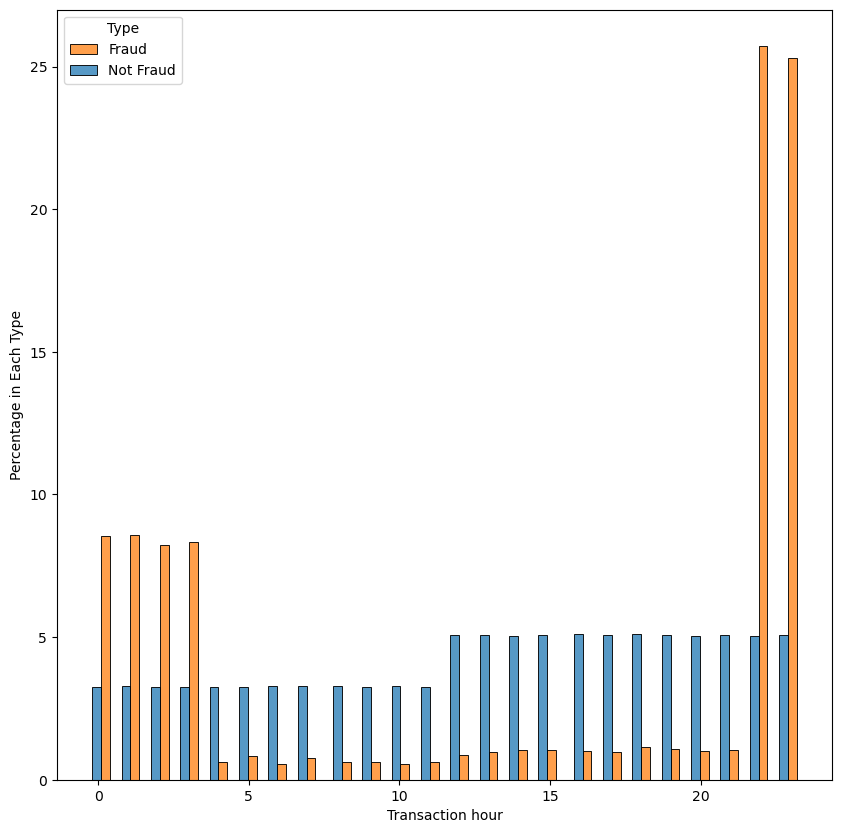

In [110]:
#Hour vs fraud
plt.figure(figsize=(10,10))
sns.histplot(x=df_new['trans_hour'],data=df_new,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,shrink=3)
plt.ylabel('Percentage in Each Type')
plt.xlabel('Transaction hour')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [111]:
#extrcting days of the week
df_new['trans_day_of_week'] = df_new['trans_date_trans_time'].dt.day_name()
df_new['trans_day_of_week']

0          Sunday
1          Sunday
2          Sunday
3          Sunday
4          Sunday
            ...  
1852389    Sunday
1852390    Sunday
1852391    Sunday
1852392    Sunday
1852393    Sunday
Name: trans_day_of_week, Length: 1852394, dtype: object

In [113]:
df_new['trans_day_of_week'].value_counts()

Monday       369418
Sunday       343677
Tuesday      270340
Saturday     263227
Friday       215078
Thursday     206741
Wednesday    183913
Name: trans_day_of_week, dtype: int64

C:\Users\Fadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trans_day_of_week', ylabel='count'>

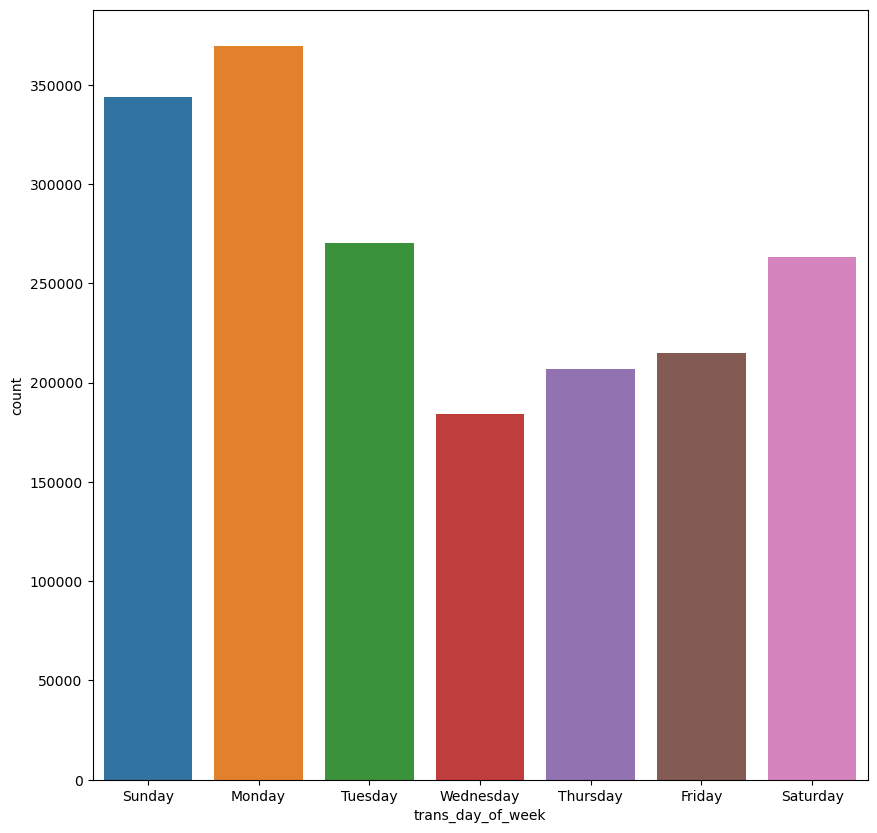

In [112]:
#ploting transactions based on days of the week
plt.figure(figsize=(10,10))
sns.countplot(df_new['trans_day_of_week'])

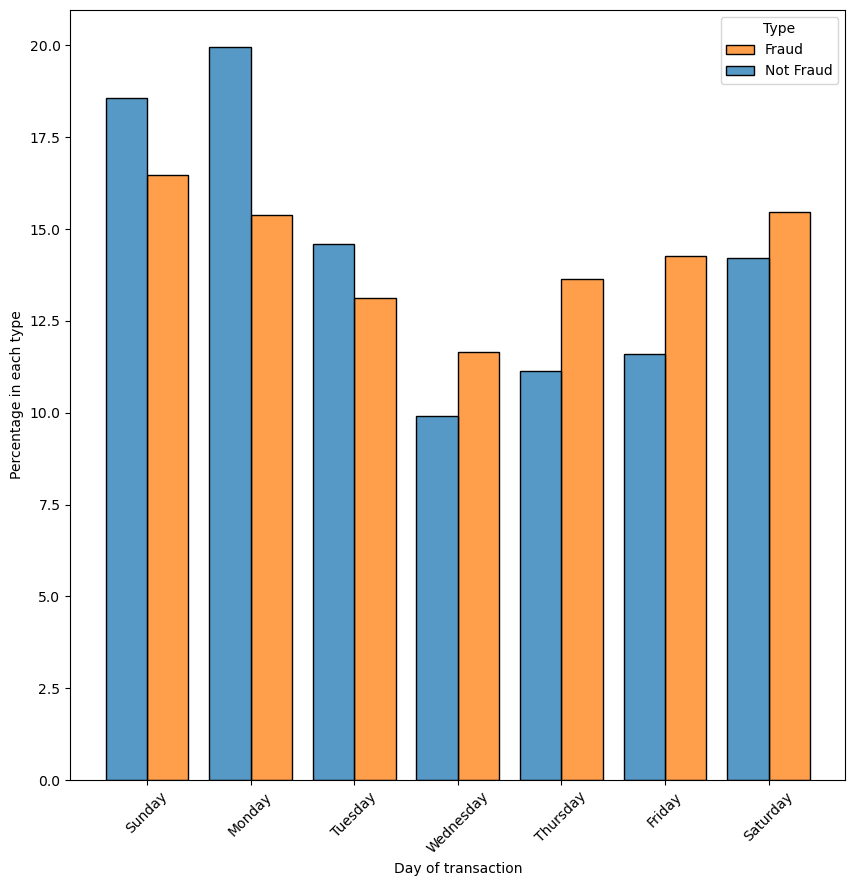

In [116]:
# Day vs fraud
plt.figure(figsize=(10,10))
sns.histplot(x=df_new['trans_day_of_week'],data=df_new,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,shrink=0.8)
plt.ylabel('Percentage in each type')
plt.xlabel('Day of transaction')
plt.xticks(rotation=45)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\Fadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trans_month', ylabel='count'>

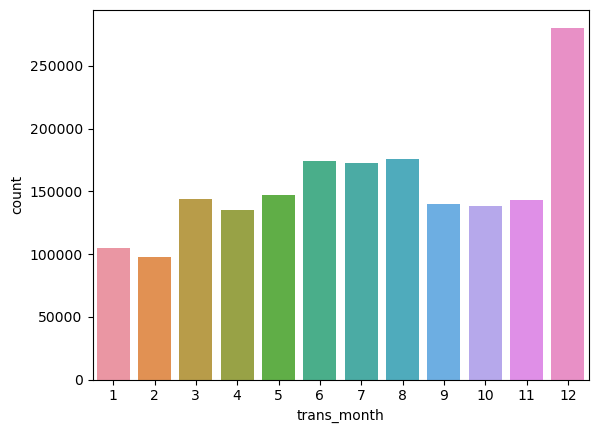

In [117]:
#ploting transactions based on months of the year
sns.countplot(df_new['trans_month'])

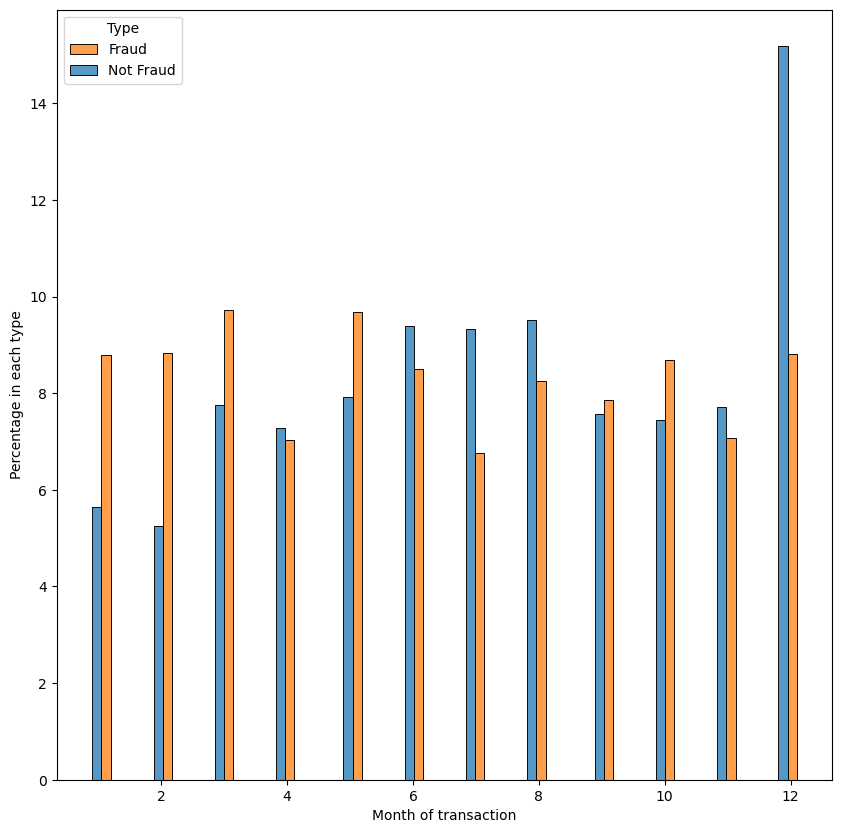

In [118]:
# Month vs fraud
plt.figure(figsize=(10,10))
sns.histplot(x=df_new['trans_month'],data=df_new,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,shrink=3)
plt.ylabel('Percentage in each type')
plt.xlabel('Month of transaction')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'personal_care'),
  Text(1, 0, 'health_fitness'),
  Text(2, 0, 'misc_pos'),
  Text(3, 0, 'travel'),
  Text(4, 0, 'kids_pets'),
  Text(5, 0, 'shopping'),
  Text(6, 0, 'food_dining'),
  Text(7, 0, 'home'),
  Text(8, 0, 'entertainment'),
  Text(9, 0, 'misc_net'),
  Text(10, 0, 'gas_transport')])

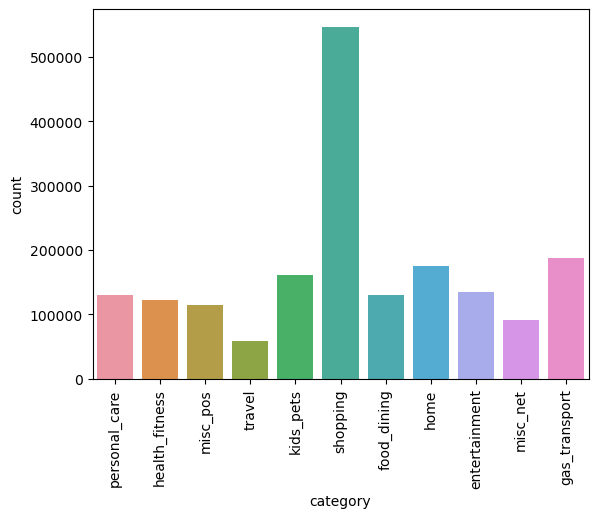

In [150]:
#ploting transactions based on category
sns.countplot(x = 'category', data = df_new)
plt.xticks(rotation=90)

In [151]:
def clean_category(x):
     if x in ['shopping_pos','shopping_net','grocery_pos','grocery_net']:
        return 'shopping'
     else:
        return x

In [140]:
df_new['category'] = list(map(clean_category, df_new['category'])) 
df_new

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day,trans_hour,trans_day_of_week,hour_category
0,0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,33.986391,-81.200714,0,0,12:14:25,6,21,12-23 hours,Sunday,
1,1,0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,39.450498,-109.960431,0,33,12:14:33,6,21,12-23 hours,Sunday,
2,1,0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,40.495810,-74.196111,0,53,12:14:53,6,21,12-23 hours,Sunday,
3,0,1,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,28.812398,-80.883061,0,36,12:15:15,6,21,12-23 hours,Sunday,
4,0,1,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,44.959148,-85.884734,0,68,12:15:17,6,21,12-23 hours,Sunday,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,...,36.841266,-111.690765,0,62,12:12:08,6,21,12,Sunday,
1852390,0,1,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,...,38.906881,-78.246528,0,44,12:12:19,6,21,12,Sunday,
1852391,0,1,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,...,33.619513,-105.130529,0,56,12:12:32,6,21,12,Sunday,
1852392,0,1,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,...,42.788940,-103.241160,0,43,12:13:36,6,21,12,Sunday,


In [141]:
df_new['category'].value_counts()

shopping          546854
gas_transport     188029
home              175460
kids_pets         161727
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
travel             57956
Name: category, dtype: int64

In [152]:
high_trans_category = df_new.category.value_counts().head(7).index.tolist()
high_trans_category

['shopping',
 'gas_transport',
 'home',
 'kids_pets',
 'entertainment',
 'food_dining',
 'personal_care']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'shopping'),
  Text(1, 0, 'gas_transport'),
  Text(2, 0, 'home'),
  Text(3, 0, 'kids_pets'),
  Text(4, 0, 'entertainment'),
  Text(5, 0, 'food_dining'),
  Text(6, 0, 'personal_care')])

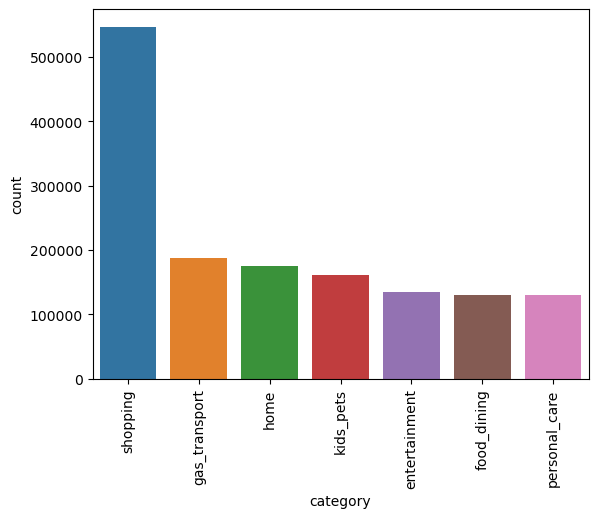

In [158]:
sns.countplot(x = 'category',
              data = df_new,
              order = df_new[df_new.category.isin(high_trans_category)].category.value_counts().index)
plt.xticks(rotation=90)

In [160]:
df_new['category'] = list(map(category, df_new['category'])) 
df_new

,F,M,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,merch_lat,merch_long,is_fraud,age,trans_time,trans_month,trans_day,trans_hour,trans_day_of_week,hour_category
0,0,1,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,6,2.86,Jeff,Elliott,M,...,33.986391,-81.200714,0,0,12:14:25,6,21,12-23 hours,Sunday,
1,1,0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,6,29.84,Joanne,Williams,F,...,39.450498,-109.960431,0,33,12:14:33,6,21,12-23 hours,Sunday,
2,1,0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",7,41.28,Ashley,Lopez,F,...,40.495810,-74.196111,0,53,12:14:53,6,21,12-23 hours,Sunday,
3,0,1,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,8,60.05,Brian,Williams,M,...,28.812398,-80.883061,0,36,12:15:15,6,21,12-23 hours,Sunday,
4,0,1,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,10,3.19,Nathan,Massey,M,...,44.959148,-85.884734,0,68,12:15:17,6,21,12-23 hours,Sunday,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,4,15.56,Erik,Patterson,M,...,36.841266,-111.690765,0,62,12:12:08,6,21,12,Sunday,
1852390,0,1,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,5,51.70,Jeffrey,White,M,...,38.906881,-78.246528,0,44,12:12:19,6,21,12,Sunday,
1852391,0,1,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,5,105.93,Christopher,Castaneda,M,...,33.619513,-105.130529,0,56,12:12:32,6,21,12,Sunday,
1852392,0,1,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",5,74.90,Joseph,Murray,M,...,42.788940,-103.241160,0,43,12:13:36,6,21,12,Sunday,


In [97]:
df["is_fraud"].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

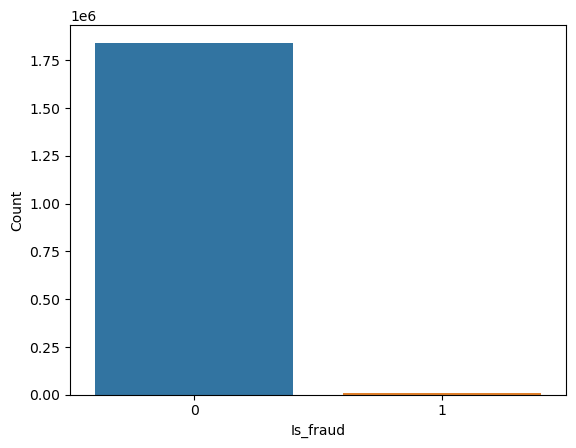

In [162]:
sns.countplot(x = 'is_fraud', data = df_new)
plt.ylabel('Count')
plt.xlabel('Is_fraud')
plt.show()

In [181]:
#creating a new df for updated numerical columns
df_num= df_new[['amt','F','M','trans_month','category']]
df_num.head()

,amt,F,M,trans_month,category
0,2.86,0,1,6,6
1,29.84,1,0,6,6
2,41.28,1,0,6,7
3,60.05,0,1,6,8
4,3.19,0,1,6,10


<AxesSubplot:>

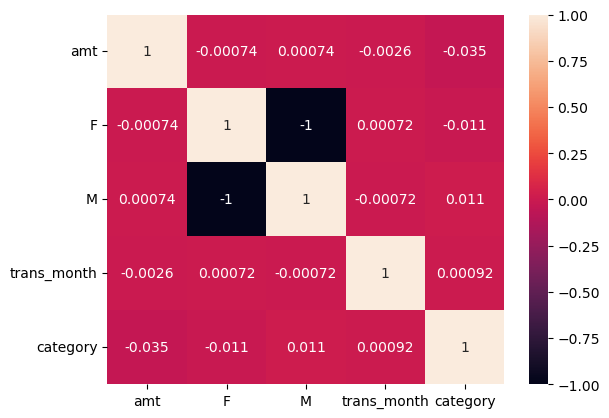

In [182]:
sns.heatmap(df_num.corr(),annot=True)

In [183]:
y = fraud["is_fraud"]
X = df_num

# Train Test Split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Applying our 2 models 1: Logistic Regression with multiple variable & 2: Decision Tree

In [185]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [186]:
X_train.shape

(1481915, 5)

In [187]:
X_test.shape

(370479, 5)

# Logistic Regression with Multiple Features

Logistic regression!
Training acc: 0.994342455538948
**Test acc**: 0.9942641823153269


# Decision Tree Classifier

In [189]:
model2 = DecisionTreeClassifier(max_depth=5)
model2.fit(X_train,y_train)
print("Reasonable Decision tree!")
print(f"Training acc: {model2.score(X_train,y_train)}")
print(f"**Test acc**: {model2.score(X_test, y_test)}")

Reasonable Decision tree!
Training acc: 0.9954140419659697
**Test acc**: 0.9954140450605837


In [88]:
# Data Leak: All the cases where "isflaggedfraud" = 1, are already fraudualent transractions. I will be removing this feature during
# the feature engineering of this dataset.
#diamonds[['IsFraud','IsFlaggedFraud']].groupby('IsFraud').sum()

In [58]:
#sns.catplot(data=diamonds, x='Type', kind = 'count' , order =)
#plt.title('Show of Type', fontsize=18)
#plt.ylabel('Frequency', fontsize=14)
#plt.xlabel('Type', fontsize=14)
#plt.tick_params(labelsize=13)
#plt.xticks(rotation=45)
#plt.show()

In [59]:
#plt.figure()
#plt.bar(diamonds['Type'].value_counts().index, 
       # diamonds['Type'].value_counts().values)
#plt.xticks(rotation=45)
#plt.show()

In [60]:
#sns.distplot(diamonds['Amount'], bins=30)

In [68]:
#x= diamonds['IsFraud'].value_counts()

#x

In [67]:
#sns.countplot(x='IsFraud' ,  data=diamonds)
#plt.title('Number of fraudulent vs non-fraudulent transcations')
#plt.show()